# Assignment 5

Partner - Nidhi Galgali

This work is solely ours and the whole assignment was done in each other presence 

# Problem 1

## Part 1

D="AAAAAAB"---> pattern found at the end of D
P="AAB"
d=7
p=3
The brute-force method compares one character at a time to find a mismatch.
The worst case scenario arises when there are p comparisons till the end of the text D is reached. In other words, each substring will have 3 comparisons. The total number of comparisons would be p(d-p+1).
If the given pattern to be searched in at the end of the text D or is not present in D,the time complexity reults in Ω(dp).

## Part 2

In [1]:
def find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    for i in range(n-m+1):
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            return T.count(P) # returns the count of non-overlapping substrings
        
    return -1

In [2]:
def find_boyer_moore(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
     # If match , decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return T.count(P)
            else:
                i -= 1
                k -= 1
 # Not match , reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return -1



In [3]:
# KMP failure function
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

In [4]:
#KMP
def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                 return T.count(P)
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1
T="abdabfabacdefssfababac"
P="aba"
T1="abdabfabdcacdefssfabdcabdcac"
P1="abdc"
T2= "1213451212178651231212121"
P2 = "121"
print("Number of non-overlapping occurences for brute-force method:",find_brute(T,P))
print("Number of non-overlapping occurences for boyer-moore method:",find_boyer_moore(T,P))
print("Number of non-overlapping occurences for kmp method:",find_kmp(T,P))
print("\n")
print("Number of non-overlapping occurences for brute-force method:",find_brute(T1,P1))
print("Number of non-overlapping occurences for boyer-moore method:",find_boyer_moore(T1,P1))
print("Number of non-overlapping occurences for kmp method:",find_kmp(T1,P1))
print("\n")
print("Number of non-overlapping occurences for brute-force method:",find_brute(T2,P2))
print("Number of non-overlapping occurences for boyer-moore method:",find_boyer_moore(T2,P2))
print("Number of non-overlapping occurences for kmp method:",find_kmp(T2,P2))

Number of non-overlapping occurences for brute-force method: 2
Number of non-overlapping occurences for boyer-moore method: 2
Number of non-overlapping occurences for kmp method: 2


Number of non-overlapping occurences for brute-force method: 3
Number of non-overlapping occurences for boyer-moore method: 3
Number of non-overlapping occurences for kmp method: 3


Number of non-overlapping occurences for brute-force method: 4
Number of non-overlapping occurences for boyer-moore method: 4
Number of non-overlapping occurences for kmp method: 4


# Problem 2

In [5]:
#Citation from the laboratory exercise of week 11
import random
import time 
import string
import matplotlib.pyplot as plt

In [6]:
#Brute Force
def find_brute(T, P):
    n, m = len(T), len(P)
    count = 0
    # every starting position
    for i in range(n-m+1):
        k = 0
        count+=1
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            return i,count
    return -1,count

In [7]:
#Boyer Moore
def find_boyer_moore(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0: 
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        # If match, decrease i,k
        count+=1
        if T[i] == P[k]:
            if k == 0:
                return i,count
            else:
                i -= 1
                k -= 1
        # Not match, reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return -1,count

In [8]:
# KMP failure function
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else: 
            j += 1
    return fail

In [9]:
# KMP
def find_kmp(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        count+=1
        if T[j] == P[k]:
            if k == m-1:
                return j-m+1,count
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1,count

In [10]:
# compare the three algorithms
def compare(T, P):
    C1 = []
    C2 = []
    C3 = []
    for i in range(len(P)-1):
        
        startTime = time.time()
        index,c1 = find_brute(T[i], P[i])
        endTime = time.time()
        C1.append(c1)

        startTime = time.time()
        index,c2 = find_boyer_moore(T[i], P[i])
        endTime = time.time()
        C2.append(c2)

        startTime = time.time()
        index,c3 = find_kmp(T[i], P[i])
        endTime = time.time()
        C3.append(c3)
    return C1,C2,C3

## Part 1

In [11]:
def generate_random_strings(letters, size):
    return ''.join(random.choice(letters) for i in range(size))

In [12]:
# set random seed so you will always get the same random_string
random.seed(2000928377)
# Play with letter_set
letter_set = "SRNG"
letter_set = string.ascii_letters

random_string = generate_random_strings(letter_set, 10**4)
#print(random_string)

In [13]:
m = []
n = []
k = []
pattern = []
test_string = []
j = 0
for i in range(10,200,10):
    pattern.append(generate_random_strings("SRNG", i))
    # append pattern to the end of string
    test_string.append(random_string + pattern[j])
    j+=1
m,n,k = compare(test_string, pattern)
print(m)
print(n)
print(k)

[10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001]
[1066, 567, 392, 304, 274, 250, 241, 234, 222, 234, 262, 241, 240, 253, 254, 242, 299, 290]
[10204, 10206, 10220, 10230, 10236, 10246, 10268, 10278, 10288, 10298, 10305, 10306, 10328, 10338, 10336, 10346, 10356, 10370]


We can clearly see that the the no. of comparisons for different input size for each algorithm is different the KMP algorithm has the most amount of comparisons. the value is so large that the graph for the same seems to be linear.

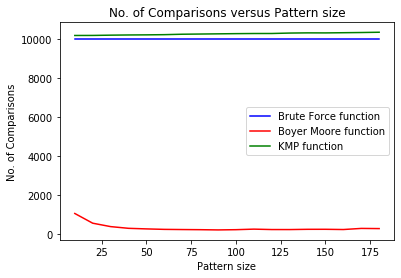

In [14]:
I = []
for i in range(10,190,10):
    I.append(i)
plt.xlabel('Pattern size')
plt.ylabel('No. of Comparisons')
plt.title('No. of Comparisons versus Pattern size')
plt.plot(I,m, color = 'b', label = 'Brute Force function')
plt.plot(I,n, color = 'r', label = 'Boyer Moore function')
plt.plot(I,k, color = 'g', label = 'KMP function')
plt.legend()


## Part 2 

In [15]:
# compare the three algorithms
def compare(T, P):
    I1 = []
    I2 = []
    I3 = []
    for i in range(len(P)-1):
        
        startTime = time.time()
        index,c1 = find_brute(T[i], P[i])
        endTime = time.time()
        I1.append(endTime - startTime)

        startTime = time.time()
        index,c2 = find_boyer_moore(T[i], P[i])
        endTime = time.time()
        I2.append(endTime - startTime)

        startTime = time.time()
        index,c3 = find_kmp(T[i], P[i])
        endTime = time.time()
        I3.append(endTime - startTime)
    return I1,I2,I3

In [16]:
def generate_random_strings(letters, size):
    return ''.join(random.choice(letters) for i in range(size))

In [17]:
# set random seed so you will always get the same random_string
random.seed(2000855651)
# Play with letter_set
letter_set = "SRNG"
letter_set = string.ascii_letters

random_string = generate_random_strings(letter_set, 10**7)
#print(random_string)

### Case 1: When pattern is added to the last of the random string 

In [18]:
m = []
n = []
k = []
pattern = []
test_string = []
j = 0
for i in range(10,200,10):
    pattern.append(generate_random_strings("SRNG", i))
    # append pattern to the end of string
    test_string.append(random_string + pattern[j])
    j+=1
m,n,k = compare(test_string, pattern)

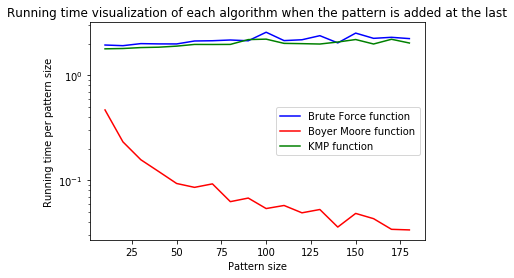

In [19]:
I = []
for i in range(10,190,10):
    I.append(i)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pattern size')
plt.ylabel('Running time per pattern size')
plt.title('Running time visualization of each algorithm when the pattern is added at the last')
plt.plot(I,m, color = 'b', label = 'Brute Force function')
plt.plot(I,n, color = 'r', label = 'Boyer Moore function')
plt.plot(I,k, color = 'g', label = 'KMP function')
plt.legend()

When the pattern is at the last we can clearly see that boyer Moore gives use the fastest output and brute force & KMP algorithms almost take equal amount of time.

### Case 2: When the pattern is added before the random string 

In [20]:
m = []
n = []
k = []
pattern = []
test_string = []
j = 0
for i in range(10,200,10):
    pattern.append(generate_random_strings("SRNG", i))
    # append pattern to the end of string
    test_string.append(pattern[j] + random_string)
    j+=1
m,n,k = compare(test_string, pattern)

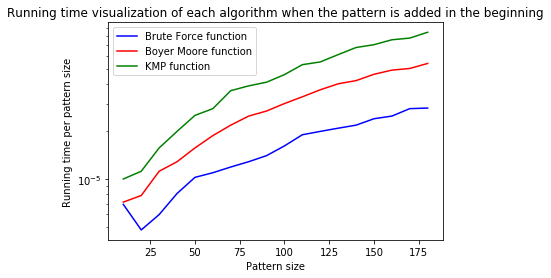

In [21]:
plt.yscale('log')
plt.xlabel('Pattern size')
plt.ylabel('Running time per pattern size')
plt.title('Running time visualization of each algorithm when the pattern is added in the beginning')
plt.plot(I,m, color = 'b', label = 'Brute Force function')
plt.plot(I,n, color = 'r', label = 'Boyer Moore function')
plt.plot(I,k, color = 'g', label = 'KMP function')
plt.legend()

Since the pattern is added at the beginning the brute force algorithm gives us the fastest output followed by Boyer Moore and KMP algorithm.

### Case 3: When the pattern is added in the middle of the random string 

In [22]:
m = []
n = []
k = []
pattern = []
test_string = []
j = 0
for i in range(10,200,10):
    pattern.append(generate_random_strings("SRNG", i))
    # append pattern to the end of string
    test_string.append(random_string[:len(random_string)//2] + pattern[j] + random_string[len(random_string)//2:])
    j+=1
m,n,k = compare(test_string, pattern)

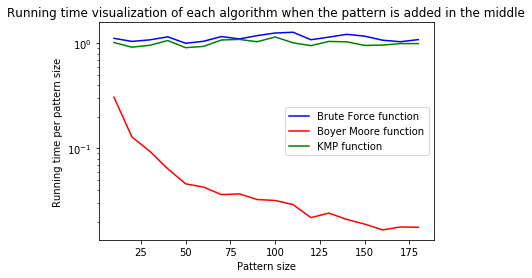

In [23]:
plt.yscale('log')
plt.xlabel('Pattern size')
plt.ylabel('Running time per pattern size')
plt.title('Running time visualization of each algorithm when the pattern is added in the middle')
plt.plot(I,m, color = 'b', label = 'Brute Force function')
plt.plot(I,n, color = 'r', label = 'Boyer Moore function')
plt.plot(I,k, color = 'g', label = 'KMP function')
plt.legend()

When the pattern is added in between the time complexity is almost same as the Case 1 and therefore we can conclude that for average case the Boyer Moore algorithm is the best and gives us the fastest output.

# Problem 3

In [24]:
def Parenthesization(B, i, j):
    if i == j:
        ascii= chr(i+64)
        print(ascii, end ="")
        return
    
    print("(", end = "")
    Parenthesization(B, i, B[i][j])
    Parenthesization(B, B[i][j]+1, j)
    print (")", end = "" )

def chainMultiply(d, i, j,B):
    global bracket 
    if i == j:
        return 0
 
    minCount = float('inf')
 
    for k in range(i, j):
        count = (chainMultiply(d, i, k, B)
                 + chainMultiply(d, k + 1, j, B)
                 + d[i-1] * d[k] * d[j])
 
        if count < minCount:
            minCount = count
            B[i][j] = k
    bracket = B
    
    return minCount
 
d = [40, 20, 30, 10, 30]
size = len(d)
B = [[0 for col in range(size)] for row in range(size)]


print("Minimum Cost: ", chainMultiply(d, 1, size-1,B))
print("Parenthesized Product: ") 
Parenthesization(bracket, 1,size-1)

Minimum Cost:  26000
Parenthesized Product: 
((A(BC))D)

The code above follows the brute-force method for finding the optimal parthesized product.The brute-force approach determines all the ways in which the matrix multiplication can be parenthesized. If there are n matrices there n-1 ways of fully parenthesizing the product.
Line 32: d is the list of dimensions of matrices such that A has a dimension of 40*20 ,B has a dimension of 20*30 ,C has a dimension of 30*10 and D has a dimension of 10*30.
The function chainMultiply finds all the possible multiplication costs for the Matrices and prints the minimum of all costs.The index of k is stored in the matrix bracket that is passed to the parenthesization function to print the optimal parenthesized product.
The code has a runtime of Ω(2^n) which is not efficient especially, for large values of n.

In [25]:
# REFERENCE: TEXTBOOK
def Parenthesization(B, i, j ):
 
    if i == j:
        ascii= chr(i+65)
        print(ascii, end ="")
        
    else:
        print("(", end = "")
        Parenthesization(B, B[i][j] - 1, j)
        Parenthesization(B, i, B[i][j])
        print (")", end = "" )
def Matmul(dim, size):
 
  
    A = [[0 for i in range(size)]
            for i in range (size)]
    B = [[0 for i in range(size)]
            for i in range (size)]
    for x in range (2, size + 1):
        for i in range ((size - x) + 1):
            j = i + x - 1
            A[i][j] = float('Inf')
            for k in range (i, j):
                cost = (A[i][k] + A[k + 1][j] +
                    (dim[i] * dim[k + 1] * dim[j + 1]));
                if (cost < A[i][j]):
                    A[i][j] = cost
                    B[j][i] = k + 1
    
    #print(B)
    print("Parenthesized product:",end="")
    Parenthesization(B, size - 1, 0)
    print("\n")
    print("Minimum cost:",A[0][size - 1])

dimensions = [40, 20, 30, 10, 30]
size = len(dimensions) - 1
Matmul(dimensions, size)

Parenthesized product:((A(BC))D)

Minimum cost: 26000


The bottom-up approach is a iterative approach unlike the brute-force(naive) method.The function Matmul stores and computes the minimum number of scalar multiplications needed to compute the product p(i) x p(i + 1) x … x p(j) in A
The index of the matrix after which the above product is split in an optimal parenthesization is stored in S. The function parenthesization takes S as argument to determine where the brackets should be inserted.

# Problem 4

In [26]:
#Citation from the textbook Introduction to Algorithms, Thomas H. Cormen, Clifford Stein, Charles E. Leiserson, Ronald Rivest
def LongestCommonSubsequence(s1,s2):
    m = len(s1)
    n = len(s2)
    array_lcs = [[0 for col in range(n+1)] for row in range(m+1)]
    for i in range(m+1):
        for j in range(n+1):
            if i ==0 or j ==0:
                array_lcs[i][j]= 0
            elif s1[i-1]==s2[j-1]:
                array_lcs[i][j] = 1 + array_lcs[i-1][j-1]
            else:
                array_lcs[i][j] = max(array_lcs[i][j-1],array_lcs[i-1][j])
    
    #print(array_lcs)
    
    subseq = []
    i = 1
    j = 1
    while(True):
        if array_lcs[i][j] > 0:
            if array_lcs[i][j]  == (array_lcs[i-1][j-1]+1):
                if array_lcs[i][j] != array_lcs[i-1][j] and array_lcs[i][j] != array_lcs[i][j-1]:
                    subseq.append(s1[i-1])
        if i == m and j == n:
            break
        elif j == n and i != m:
            j = 1
            i+=1
        else:
            j+=1
                
    print("".join(subseq))
    return array_lcs[m][n]
            

In [27]:
# source : https://ftp.ncbi.nlm.nih.gov/genbank/  
# gbbct1.seq file
seq1 = "MSLKHFIQITKPGIIFGNVLSVAGGFFLASKGHVDLAIFLASMIGTSLVVASGCVFNNCIDRDIDLKMERTKNRVLVQGLISLEVALVYASILGVAGVALLYYVANPLAALFAVIGFVIYVGFYSLYLKRKSVHGTLVGSLSGAMPPVIGYVAVSNSFDMAALTLLVMFSLWQMPHSYAIAIFRFNDYLAASIPVLPVKRGIRVAKKHILLYILAFLVATLMLTFSGYAGMSYLAVAAAMGMYWLYMAWTGYKAVDDTVWARKLFVFSIFTITALSVMMSVDFKAPTELLLTYAH"
seq2 = "MKTLAALFGASLVALTASLAHARDLGPDEALRLRDAGTIVSFEKLNATALSRHPGASISETELEEEYGKYIYQVELRDPQGLEWDLELDAVSGQVLKDHQDT"

print(LongestCommonSubsequence(seq1,seq2))

MSLLKKHHFFIIQITTTTTTKKPPPGGGGGIIIFFGGGGNVVVVLLLLLLLSSSSSVVVVVAAAAAAAGGGGGGGFFLLLLLLLLAAAAAAASSSSSKKKGGGGGGHHHVVVVVDDDLLLLLLLLLLAAAAAAAAIIFFLLLLLLAAAAAASSSSSIIGGGGGGTTTTTSSSSLLLLLLLVVVVAAAAAAASSSSSGGGGGVVVFNIIDDDDDRRRRDDDDIDDLLLLLLLLLLLKKKEEEEEEERRRTTTTTKKKNRRVVVVLLLLLLLLLVQQQGGGGGGLLIIISSSSSSLLLLLEEEEEEVVVAAAAAAAALLLLLLLLLLVYAAAASSSSSIIILLLLLLGGGGGGVVVVAAAAAGVALLLLLLLLLYYVAAANPPPLLAAAAALLLLFAAVIIIGGGGGGVVIYYYVVGFYSSSSSLLLLLLLYYLKKKRRRRRSVHHHGGGGGTTTTTLLLLLLLVVVGGSSSSLLSGAAAAAAAPPPVVVIIIGGGGYYYVVVAAASSSSSNSFDDDDDDAAAAALLLLLLLLLTTTTLLLLVVSSLLWQQQQPPHHYAAAAAAIIIRRRRRNDDDDDDYYLLLLLLAAAASSSSSIIIPPPVVVVLLLLLPKKKRRRGGGGGGIVVVAAKKHHHIILLLLLYYYILLAAAFLLVVATTTTLLLLTSSSSSGGGGYYAAGSYLLLLVVYWLLLATTGGYKKKVDDDDDDDTAAARRRLLLLLFVSSSIIITALLSVVVSDDDFKAAPPPTTEEEEEEELLLLLLLLLTYAAAAHH
61
